In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('D:/uni/SECONDO ANNO/ADVANCE MACHINE LEARNING/Assignment/training_data.csv')
test = pd.read_csv('D:/uni/SECONDO ANNO/ADVANCE MACHINE LEARNING/Assignment/testing_data.csv')

In [3]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,200000.0,1,2,2,27,0,0,0,0,0,...,183180.0,192223.0,189681.0,7000.0,8100.0,6600.0,12000.0,0.0,6054.0,1
1,160000.0,1,5,2,46,0,0,0,0,-2,...,0.0,0.0,0.0,4318.0,4000.0,0.0,0.0,0.0,73175.0,0
2,130000.0,2,1,2,27,1,-2,-1,0,0,...,29426.0,29100.0,-1410.0,326.0,32100.0,0.0,0.0,0.0,0.0,1
3,70000.0,1,2,2,26,0,0,0,0,0,...,60540.0,26890.0,18923.0,3000.0,4000.0,2000.0,4030.0,0.0,1000.0,0
4,330000.0,2,1,1,37,-2,-2,-2,-2,-2,...,0.0,442.0,0.0,0.0,10776.0,0.0,442.0,0.0,297.0,0


In [4]:
train.rename(columns = {'default.payment.next.month':'default_payment_next_month'}, inplace = True)

In [5]:
train.shape

(27000, 24)

In [6]:
test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,1,1,2,33,1,2,2,2,2,...,19057.0,18453.0,19755.0,19288.0,0.0,2260.0,0.0,1600.0,0.0,644.0
1,20000.0,2,2,2,35,0,0,2,0,0,...,18600.0,19000.0,19000.0,20000.0,3400.0,0.0,1000.0,0.0,1000.0,0.0
2,230000.0,2,1,1,44,1,-1,-1,-1,-1,...,2864.0,933.0,0.0,0.0,949.0,2873.0,933.0,0.0,0.0,0.0
3,100000.0,1,2,1,42,0,0,0,0,0,...,16138.0,17758.0,18774.0,20272.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0
4,150000.0,1,1,2,29,-2,-2,-2,-2,-2,...,831.0,6469.0,5138.0,7810.0,6989.0,833.0,6488.0,5153.0,7833.0,7130.0


In [7]:
test.shape

(3000, 23)

In [8]:
for i in train.columns:
    print(train[i].describe())
    print('\n')

count     27000.000000
mean     167649.247407
std      129646.456604
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64


count    27000.000000
mean         1.602444
std          0.489402
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64


count    27000.000000
mean         1.854185
std          0.790020
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64


count    27000.000000
mean         1.551630
std          0.521831
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64


count    27000.000000
mean        35.490778
std          9.201953
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max  

In [9]:
train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [10]:
test.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [11]:
#Ci sono missing values?
train.isnull().any().any()

False

In [12]:
test.isnull().any().any()

False

Correlation Matrix

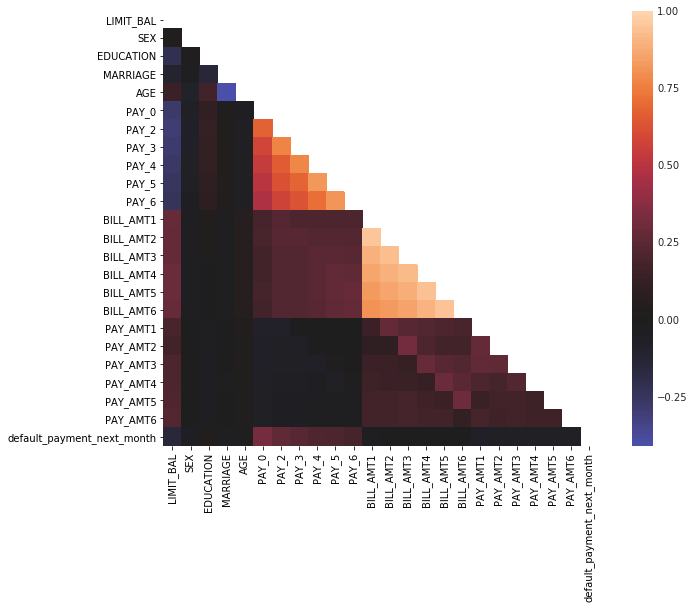

In [13]:
x = train.corr()
f, ax = plt.subplots(figsize= (12,8))
mask = np.zeros_like(x)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(x, mask=mask, center = 0, square=True)

Vediamo come si distribuiscono i valori del target

In [14]:
target_count = train.default_payment_next_month.value_counts()

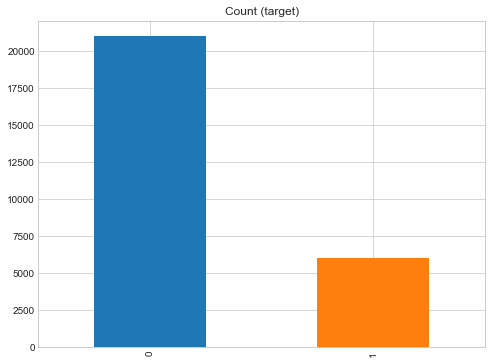

In [15]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize= (8,6))
target_count.plot(kind='bar', title='Count (target)')

In [16]:
target_count[1] / train.shape[0]   #target_count[1] contiene il numero di osservazioni aventi come target la classe positiva (1)

0.22207407407407406

## Class imbalance!!!!

###### Prima divido il train in train e validation

In [17]:
validation = train[-4000:] #prendo le ultime 4000 righe dal train

In [18]:
validation.shape

(4000, 24)

In [19]:
train.drop(train.tail(4000).index,inplace=True) #droppo le ultime 4000 righe dal train

In [20]:
train.shape

(23000, 24)

In [21]:
target_train = train.default_payment_next_month.values
train.drop('default_payment_next_month', axis = 1, inplace = True)

In [22]:
target_validation = validation.default_payment_next_month.values
validation.drop('default_payment_next_month', axis = 1, inplace = True)

C:\Users\done-\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
target_validation.shape

(4000,)

In [24]:
validation.shape

(4000, 23)

In [25]:
train.shape

(23000, 23)

In [26]:
target_train.shape

(23000,)

### Class imbalance: si procede con il ricampionamento della classe positiva sul train (oversampling)

In [27]:
x_train = pd.DataFrame(train)
y_train = pd.DataFrame(target_train)

In [28]:
train2 = pd.concat([x_train, y_train], axis = 1)

In [29]:
train2.shape

(23000, 24)

In [30]:
train2.rename(index=str, columns={0: "default_payment_next_month"}, inplace = True)

In [31]:
train2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,200000.0,1,2,2,27,0,0,0,0,0,...,183180.0,192223.0,189681.0,7000.0,8100.0,6600.0,12000.0,0.0,6054.0,1
1,160000.0,1,5,2,46,0,0,0,0,-2,...,0.0,0.0,0.0,4318.0,4000.0,0.0,0.0,0.0,73175.0,0
2,130000.0,2,1,2,27,1,-2,-1,0,0,...,29426.0,29100.0,-1410.0,326.0,32100.0,0.0,0.0,0.0,0.0,1
3,70000.0,1,2,2,26,0,0,0,0,0,...,60540.0,26890.0,18923.0,3000.0,4000.0,2000.0,4030.0,0.0,1000.0,0
4,330000.0,2,1,1,37,-2,-2,-2,-2,-2,...,0.0,442.0,0.0,0.0,10776.0,0.0,442.0,0.0,297.0,0


In [32]:
df = train2.loc[train2['default_payment_next_month'] == 1] #dentro df metto tutte le righe con la classe rara (positiva)
train3 = train2[train2.default_payment_next_month != 1]  #Rimuovo dal train le righe prese sopra

In [33]:
train3.shape       #dataframe avente come target 0

(17909, 24)

In [34]:
df.shape           #dataframe contente solo classe rara

(5091, 24)

###### L'oversampling della classe rara sarà pari al numero di righe della classe negativa (17909)

In [35]:
df1 = df.sample(17909, replace = True)   #Eseguo il ricampionamento con replacement

In [36]:
df1.shape

(17909, 24)

In [37]:
trainfin = pd.concat([train3, df1], ignore_index= True)

In [38]:
trainfin.shape

(35818, 24)

Rimescolo le righe del dataframe

In [39]:
trainfin = trainfin.sample(frac=1)

In [40]:
trainfin.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
16852,30000.0,2,3,1,37,0,0,0,0,0,...,29680.0,29689.0,31050.0,1898.0,2632.0,1000.0,1176.0,830.0,0.0,0
31485,50000.0,1,2,2,27,0,0,0,0,0,...,20099.0,18682.0,18538.0,2055.0,1935.0,675.0,662.0,650.0,666.0,1
5771,70000.0,1,1,2,29,1,-1,-1,0,-1,...,13155.0,3929.0,1953.0,6000.0,15000.0,4000.0,4000.0,0.0,1000.0,0
22849,80000.0,2,2,2,24,0,0,0,0,0,...,79061.0,79834.0,81257.0,5501.0,3450.0,3000.0,3059.0,2915.0,2758.0,1
2117,50000.0,2,2,2,23,0,0,0,0,0,...,14859.0,9446.0,7246.0,1523.0,1353.0,1017.0,1000.0,1000.0,0.0,0


In [41]:
trainfin.shape

(35818, 24)

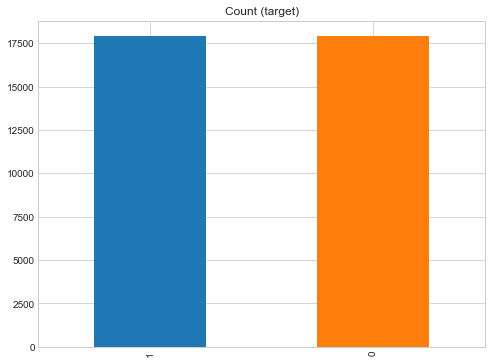

In [42]:
f, ax = plt.subplots(figsize= (8,6))
target_count = trainfin.default_payment_next_month.value_counts()
target_count.plot(kind='bar', title='Count (target)')

In [43]:
target_train = trainfin.default_payment_next_month.values
trainfin.drop('default_payment_next_month', axis = 1, inplace = True)

In [44]:
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\done-\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Si normalizzano i dati

In [45]:
df_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
df_scaler.fit(trainfin)
trainfin_norm = df_scaler.transform(trainfin)

In [46]:
df_scaler.fit(test)
test_norm = df_scaler.transform(test)

In [47]:
#Normalizzo anche il validation
df_scaler.fit(validation)
validation_norm = df_scaler.transform(validation)

Preparo il target del train

In [48]:
target_train.shape

(35818,)

In [49]:
target_train.reshape(35818, 1)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [50]:
y_train = np_utils.to_categorical(target_train)

In [51]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Preparo il target del validation

In [52]:
target_validation.shape

(4000,)

In [53]:
target_validation.reshape(4000, 1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [54]:
y_validation = np_utils.to_categorical(target_validation)

Creo la Rete Neaurale

In [55]:
model = Sequential()

model.add(Dense(1000, input_dim = trainfin_norm.shape[1], activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(90, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              24000     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               400400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_4 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                7280      
_________________________________________________________________
dense_6 (Dense)              (None, 60)                4860      
__________

In [56]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [57]:
history = model.fit(trainfin_norm, y_train, batch_size = 256, epochs = 50, verbose = 1, validation_data = (validation, y_validation))

Train on 35818 samples, validate on 4000 samples
Epoch 1/50
35818/35818 [==============================] - 5s 138us/step - loss: 0.6619 - acc: 0.5812 - val_loss: 4.4440 - val_acc: 0.7234
Epoch 2/50
35818/35818 [==============================] - 3s 71us/step - loss: 0.6139 - acc: 0.6788 - val_loss: 5.6348 - val_acc: 0.6485
Epoch 3/50
35818/35818 [==============================] - 3s 71us/step - loss: 0.5858 - acc: 0.7023 - val_loss: 6.9170 - val_acc: 0.5685
Epoch 4/50
35818/35818 [==============================] - 3s 71us/step - loss: 0.5723 - acc: 0.7067 - val_loss: 5.5570 - val_acc: 0.6531
Epoch 5/50
35818/35818 [==============================] - 3s 71us/step - loss: 0.5665 - acc: 0.7098 - val_loss: 5.3623 - val_acc: 0.6655
Epoch 6/50
35818/35818 [==============================] - 3s 72us/step - loss: 0.5632 - acc: 0.7112 - val_loss: 6.8388 - val_acc: 0.5734
Epoch 7/50
35818/35818 [==============================] - 3s 76us/step - loss: 0.5582 - acc: 0.7140 - val_loss: 4.5288 - val_acc

In [115]:
model.evaluate(validation, y_validation)

4000/4000 [==============================] - 1s 140us/step


[4.033598010063171, 0.748375]

Si prova una pca dato che fra alcune variabili era presente una forte correlazione (si veda la matrice di correlazione)

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=10)

In [60]:
train10f = pca.fit_transform(trainfin_norm)

In [61]:
train10f.shape

(35818, 10)

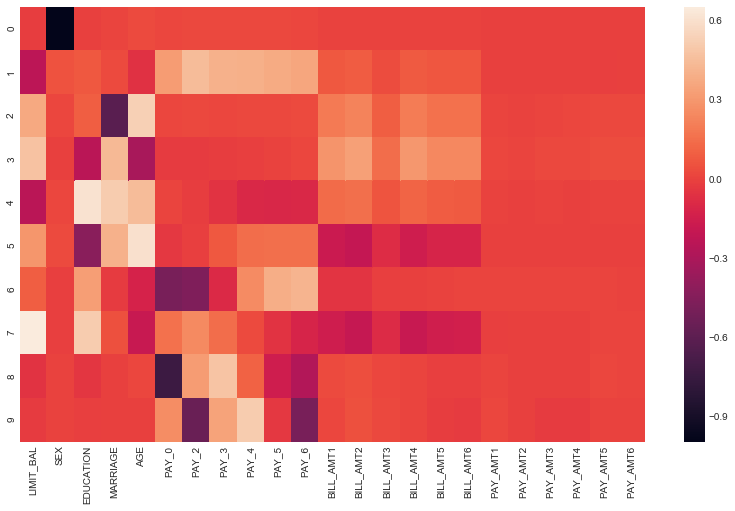

In [62]:
df = pd.DataFrame(pca.components_, columns = train.columns)
plt.figure(figsize=(14, 8))
sns.heatmap(df)

In [63]:
pca.explained_variance_ratio_

array([0.50288152, 0.16974508, 0.08955892, 0.07510548, 0.03505178,
       0.03268105, 0.02542488, 0.02201633, 0.01433682, 0.00986123])

In [64]:
test10f = pca.fit_transform(test_norm)

In [65]:
test10f.shape

(3000, 10)

In [67]:
validation10f = pca.fit_transform(validation)

Costruisco un nuovo modello e come input do il dataframe sottoposto a pca

In [68]:
train10f.shape

(35818, 10)

In [72]:
model2 = Sequential()

model2.add(Dense(1000, input_dim = train10f.shape[1], activation = 'relu'))
model2.add(Dense(400, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(90, activation = 'relu'))
model2.add(Dense(80, activation = 'relu'))
model2.add(Dense(60, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(40, activation = 'relu'))
model2.add(Dense(30, activation = 'relu'))
model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
model2.add(Dense(2, activation = 'sigmoid'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1000)              11000     
_________________________________________________________________
dense_26 (Dense)             (None, 400)               400400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_28 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_29 (Dense)             (None, 80)                7280      
_________________________________________________________________
dense_30 (Dense)             (None, 60)                4860      
__________

In [73]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [74]:
history2 = model2.fit(train10f, y_train, batch_size = 256, epochs = 50, verbose = 1, validation_data = (validation10f, y_validation))

Train on 35818 samples, validate on 4000 samples
Epoch 1/50
35818/35818 [==============================] - 4s 104us/step - loss: 0.6169 - acc: 0.6518 - val_loss: 8.1758 - val_acc: 0.4900
Epoch 2/50
35818/35818 [==============================] - 3s 72us/step - loss: 0.5811 - acc: 0.7024 - val_loss: 10.3842 - val_acc: 0.3521
Epoch 3/50
35818/35818 [==============================] - 3s 71us/step - loss: 0.5697 - acc: 0.7080 - val_loss: 8.6075 - val_acc: 0.4622
Epoch 4/50
35818/35818 [==============================] - 3s 71us/step - loss: 0.5646 - acc: 0.7096 - val_loss: 10.1466 - val_acc: 0.3661
Epoch 5/50
35818/35818 [==============================] - 3s 71us/step - loss: 0.5630 - acc: 0.7101 - val_loss: 9.3709 - val_acc: 0.4154
Epoch 6/50
35818/35818 [==============================] - 3s 71us/step - loss: 0.5590 - acc: 0.7141 - val_loss: 11.1359 - val_acc: 0.3048
Epoch 7/50
35818/35818 [==============================] - 3s 72us/step - loss: 0.5561 - acc: 0.7153 - val_loss: 11.6380 - val

In [116]:
model2.evaluate(validation10f, y_validation)

4000/4000 [==============================] - 1s 132us/step


[11.169047172546387, 0.30325]

##### Comparazione accuracy dei 2 modelli

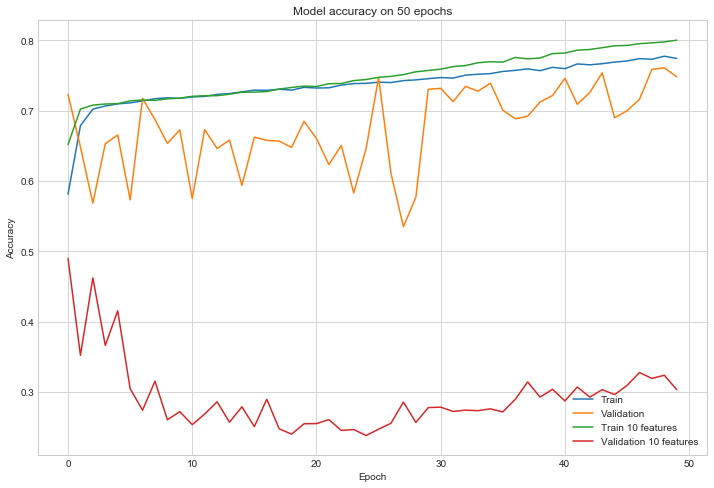

In [75]:
# Plot training & validation accuracy values
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize= (12,8))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy on 50 epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train 10 features', 'Validation 10 features'], loc='lower right')
plt.show()

La PCA non sembra la strada migliore, soprattutto per i risultati sul validation

Si visualizzano andamento di accuracy e loss nelle 50 epoche del modello che ha in input tutte le features

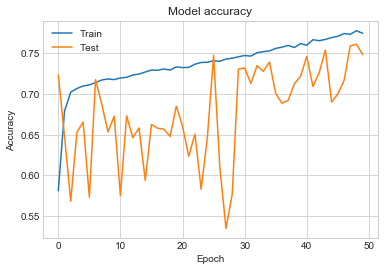

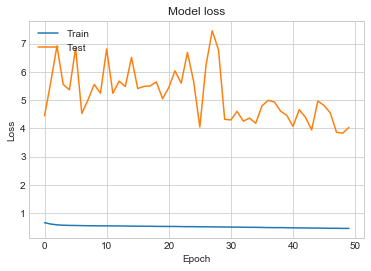

In [76]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

-----------------------------------------------------------------

### Si procede ora addestrando il modello dando in input tutto il train 

Rieseguo la lettura e manipolazione del dataframe in quanto troppo rimaneggiato durante la divisione in test e validation

In [79]:
#Ricarico il train, dato che ha subito molteplici manipolazioni
train = pd.read_csv('D:/uni/SECONDO ANNO/ADVANCE MACHINE LEARNING/Assignment/training_data.csv')

In [82]:
#Ora effettuo un over sampling di tutto il train
train.rename(index=str, columns={'default.payment.next.month': "default_payment_next_month"}, inplace = True)
df = train.loc[train['default_payment_next_month'] == 1] #dentro df metto tutte le righe con la classe rara (positiva)
train = train[train.default_payment_next_month != 1] 

In [85]:
train.shape

(21004, 24)

In [86]:
df1 = df.sample(21004, replace = True) 

In [87]:
train = pd.concat([train, df1], ignore_index= True)

In [88]:
train.shape

(42008, 24)

In [89]:
train = train.sample(frac=1)

In [92]:
target_train = train.default_payment_next_month.values

In [93]:
train.drop('default_payment_next_month', axis = 1, inplace = True)

In [95]:
df_scaler.fit(train)
train = df_scaler.transform(train)

In [98]:
df_scaler.fit(test)
test = df_scaler.transform(test)

In [100]:
#preparo il target del train
train.shape

(42008, 23)

In [102]:
target_train.shape

(42008,)

In [103]:
target_train.reshape(42008, 1)

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [104]:
y_train = np_utils.to_categorical(target_train)

In [105]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [111]:
#Modello
model3 = Sequential()

model3.add(Dense(1000, input_dim = train.shape[1], activation = 'relu'))
model3.add(Dense(400, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(90, activation = 'relu'))
model3.add(Dense(80, activation = 'relu'))
model3.add(Dense(60, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(40, activation = 'relu'))
model3.add(Dense(30, activation = 'relu'))
model3.add(Dense(20, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(5, activation = 'relu'))
model3.add(Dense(2, activation = 'sigmoid'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1000)              24000     
_________________________________________________________________
dense_62 (Dense)             (None, 400)               400400    
_________________________________________________________________
dropout_11 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_64 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_65 (Dense)             (None, 80)                7280      
_________________________________________________________________
dense_66 (Dense)             (None, 60)                4860      
__________

In [112]:
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [114]:
history3 = model3.fit(train, y_train, batch_size = 256, epochs = 50, verbose = 1, validation_split = 0.1)

Train on 37807 samples, validate on 4201 samples
Epoch 1/50
37807/37807 [==============================] - 4s 108us/step - loss: 0.6358 - acc: 0.6515 - val_loss: 0.6135 - val_acc: 0.6810
Epoch 2/50
37807/37807 [==============================] - 3s 72us/step - loss: 0.6097 - acc: 0.6851 - val_loss: 0.6076 - val_acc: 0.6833
Epoch 3/50
37807/37807 [==============================] - 3s 72us/step - loss: 0.5984 - acc: 0.6941 - val_loss: 0.5965 - val_acc: 0.6895
Epoch 4/50
37807/37807 [==============================] - 3s 72us/step - loss: 0.5932 - acc: 0.6951 - val_loss: 0.5938 - val_acc: 0.6945
Epoch 5/50
37807/37807 [==============================] - 3s 72us/step - loss: 0.5893 - acc: 0.6999 - val_loss: 0.5921 - val_acc: 0.6896
Epoch 6/50
37807/37807 [==============================] - 3s 73us/step - loss: 0.5862 - acc: 0.7000 - val_loss: 0.5879 - val_acc: 0.6922
Epoch 7/50
37807/37807 [==============================] - 3s 72us/step - loss: 0.5848 - acc: 0.7029 - val_loss: 0.5881 - val_acc

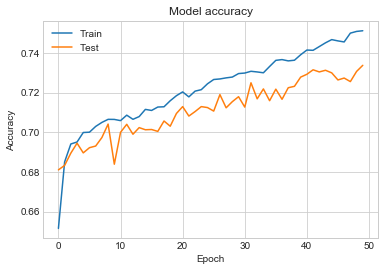

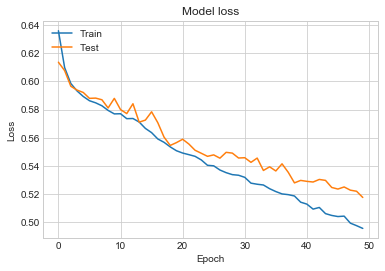

In [117]:
# Plot training & validation accuracy values
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [121]:
#addestro il modello per altre 10 epoche
history3 = model3.fit(train, y_train, batch_size = 256, epochs = 10, verbose = 1, validation_split = 0.1)

Train on 37807 samples, validate on 4201 samples
Epoch 1/10
37807/37807 [==============================] - 3s 76us/step - loss: 0.4051 - acc: 0.8037 - val_loss: 0.4630 - val_acc: 0.7767
Epoch 2/10
37807/37807 [==============================] - 3s 75us/step - loss: 0.4057 - acc: 0.7999 - val_loss: 0.4621 - val_acc: 0.7753
Epoch 3/10
37807/37807 [==============================] - 3s 74us/step - loss: 0.4025 - acc: 0.8071 - val_loss: 0.4629 - val_acc: 0.7758
Epoch 4/10
37807/37807 [==============================] - 3s 75us/step - loss: 0.4009 - acc: 0.8068 - val_loss: 0.4521 - val_acc: 0.7812
Epoch 5/10
37807/37807 [==============================] - 3s 75us/step - loss: 0.4036 - acc: 0.8040 - val_loss: 0.4619 - val_acc: 0.7811
Epoch 6/10
37807/37807 [==============================] - 3s 76us/step - loss: 0.3995 - acc: 0.8054 - val_loss: 0.4653 - val_acc: 0.7767
Epoch 7/10
37807/37807 [==============================] - 3s 82us/step - loss: 0.3969 - acc: 0.8067 - val_loss: 0.4600 - val_acc:

In [122]:
pred = model3.predict(test)

In [123]:
pred

array([[0.02734197, 0.9729423 ],
       [0.00233571, 0.99771595],
       [0.7436487 , 0.2584743 ],
       ...,
       [0.09258129, 0.90773803],
       [0.5554956 , 0.44284597],
       [0.375548  , 0.62391895]], dtype=float32)

In [124]:
pred = pd.DataFrame(pred)

In [125]:
results = []
for i in pred.index:
    if pred.iloc[i][0] > 0.5:
        results.append(0)
    else:
        results.append(1)

In [126]:
results

[1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [127]:
result = pd.DataFrame(results)

In [128]:
result.to_csv('subm.csv')